In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
# Algoritmo 1: Verificar si un Valor de RSSI es Válido
def validar_rssi(df):
    for i in range(len(df)):
        rssi = df.at[i, 'SIGNAL']
        if rssi < -100 or rssi > -30:
            df.at[i, 'SIGNAL'] = np.nan
    return df

# Algoritmo 2: Eliminar Datos Vacíos
def eliminar_vacios(df):
    return df.dropna()

# Algoritmo 3: Eliminar Datos NO Actuales
def datos_actuales(df, umbral_segundos):
    tiempo_actual = pd.Timestamp(2024, 9, 3, 10, 9, 52) #pd.Timestamp.now()
    filas_actuales = []

    for _, fila in df.iterrows():
        tiempo = fila['TIME']
        diferencia_segundos = (tiempo_actual - tiempo).total_seconds()

        if diferencia_segundos <= umbral_segundos:
            filas_actuales.append(fila)

    df_actuales = pd.DataFrame(filas_actuales, columns=df.columns)
    return df_actuales

# Algoritmo 4: Filtrar Valores Consistentes de RSSI
def consistencia_rssi(diccionario_rssi):
    diccionario_filtrado = {}
    for mac_src, array_rssi in diccionario_rssi.items():
        media = np.mean(array_rssi)
        desviacion_estandar = np.std(array_rssi)
        array_filtrado = array_rssi[np.abs(array_rssi - media) <= desviacion_estandar]
        diccionario_filtrado[mac_src] = array_filtrado
    return diccionario_filtrado

# Algoritmo 5: Obtener Diccionario de RSSI asociados a un dispositivo
def obtener_diccionario_rssi(df):
    diccionario_rssi = {}
    for _, fila in df.iterrows():
        mac_src = fila['MAC_SRC']
        rssi = fila['SIGNAL']
        if mac_src not in diccionario_rssi:
            diccionario_rssi[mac_src] = []
        diccionario_rssi[mac_src].append(rssi)
    diccionario_rssi = {mac_src: np.array(rssi_list) for mac_src, rssi_list in diccionario_rssi.items()}
    diccionario_rssi_filtrado = consistencia_rssi(diccionario_rssi)
    return diccionario_rssi_filtrado

# Algoritmo Principal para Filtrado de Datos Capturados por Horst
def calidad_datos(df, umbral_segundos):
    validar_rssi(df)
    df_sin_vacios = eliminar_vacios(df)
    df_actuales = datos_actuales(df_sin_vacios, umbral_segundos)
    return obtener_diccionario_rssi(df_actuales)

def leer_archivo(path):
    df = pd.read_csv(path, sep=",")
    df['TIME'] = pd.to_datetime(df['TIME'])        
    df['MAC_SRC'] = df['MAC_SRC'].astype(str)      
    df['BSSID'] = df['BSSID'].astype(str)          
    df['SIGNAL'] = df['SIGNAL'].astype(int)
    return df

In [3]:
umbral_segundos = 5
path = "horst_data_1000.txt"
df = leer_archivo(path)

In [4]:
df

,TIME,MAC_SRC,SIGNAL,BSSID
0,2024-09-03 10:09:49,0c:b5:27:e5:29:30,-56,08:7b:87:77:41:e0
1,2024-09-03 10:09:49,0c:b5:27:e5:29:30,-56,08:7b:87:77:41:e0
2,2024-09-03 10:09:49,0c:b5:27:e5:29:30,-56,08:7b:87:77:41:e0
3,2024-09-03 10:09:49,0c:b5:27:e5:29:30,-56,08:7b:87:77:41:e0
4,2024-09-03 10:09:49,0c:b5:27:e5:29:30,-56,08:7b:87:77:41:e0
...,...,...,...,...
995,2024-09-03 10:09:52,0c:b5:27:e5:29:30,-56,08:7b:87:77:41:e0
996,2024-09-03 10:09:52,0c:b5:27:e5:29:30,-56,08:7b:87:77:41:e0
997,2024-09-03 10:09:52,0c:b5:27:e5:29:30,-56,08:7b:87:77:41:e0
998,2024-09-03 10:09:52,0c:b5:27:e5:29:30,-56,08:7b:87:77:41:e0


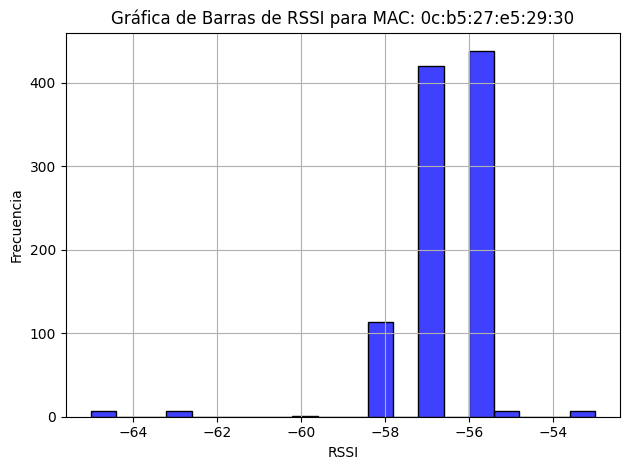

In [5]:
fig, ax = plt.subplots()

rssi_values = df[df['MAC_SRC'] == '0c:b5:27:e5:29:30']['SIGNAL']
sns.histplot(rssi_values, bins=20, kde=False, ax=ax, color='blue')
ax.set_title('Gráfica de Barras de RSSI para MAC: 0c:b5:27:e5:29:30')
ax.set_xlabel('RSSI')
ax.set_ylabel('Frecuencia')
ax.grid(True)

plt.tight_layout()
plt.show()

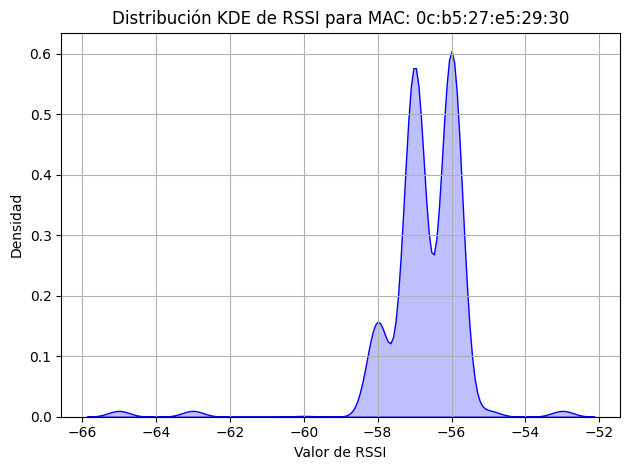

In [6]:
fig, ax = plt.subplots()

rssi_values = df[df['MAC_SRC'] == '0c:b5:27:e5:29:30']['SIGNAL']
sns.kdeplot(rssi_values, ax=ax, color='blue', fill=True)
ax.set_title('Distribución KDE de RSSI para MAC: 0c:b5:27:e5:29:30')
ax.set_xlabel('Valor de RSSI')
ax.set_ylabel('Densidad')
ax.grid(True)

plt.tight_layout()
plt.show()

In [7]:
diccionario_resultante = calidad_datos(df, umbral_segundos)

In [8]:
for mac_src, rssi_values in diccionario_resultante.items():
    print(f"MAC_SRC: {mac_src}, RSSI Values: {rssi_values}")

MAC_SRC: 0c:b5:27:e5:29:30, RSSI Values: [-56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -57 -56 -57 -57
 -57 -57 -57 -57 -57 -57 -56 -57 -57 -57 -57 -57 -57 -57 -57 -57 -57 -57
 -57 -57 -57 -57 -57 -57 -57 -57 -57 -57 -57 -57 -57 -57 -57 -57 -57 -57
 -57 -57 -57 -57 -57 -57 -57 -56 -56 -57 -57 -56 -56 -56 -57 -56 -56 -56
 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56
 -56 -56 -57 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -57 -57 -57 -57 -56
 -56 -57 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56
 -57 -56 -57 -57 -57 -57 -57 -57 -57 -57 -56 -57 -57 -57 -57 -57 -57 -57
 -57 -57 -57 -57 -57 -57 -57 -57 -57 -57 -57 -57 -57 -57 -57 -57 -57 -57
 -57 -57 -57 -57 -57 -57 -57 -56 -56 -57 -57 -56 -56 -56 -57 -56 -56 -56
 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56
 -56 -56 -57 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -57 -57 -57 -57 -56
 -56 -57 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56 -56
 -57 -56 -

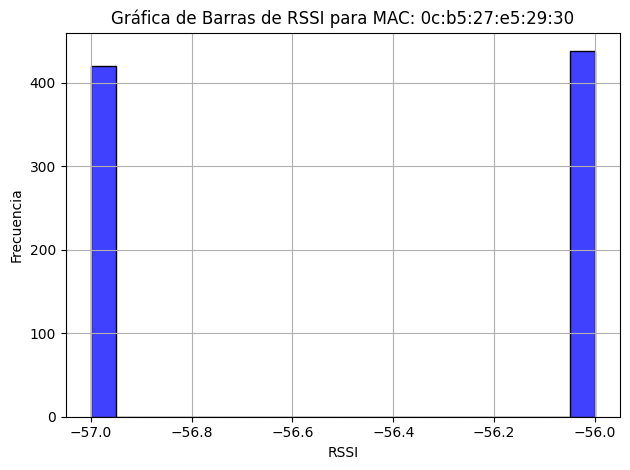

In [9]:
fig, ax = plt.subplots()

sns.histplot(diccionario_resultante['0c:b5:27:e5:29:30'], bins=20, kde=False, ax=ax, color='blue')
ax.set_title('Gráfica de Barras de RSSI para MAC: 0c:b5:27:e5:29:30')
ax.set_xlabel('RSSI')
ax.set_ylabel('Frecuencia')
ax.grid(True)

plt.tight_layout()
plt.show()

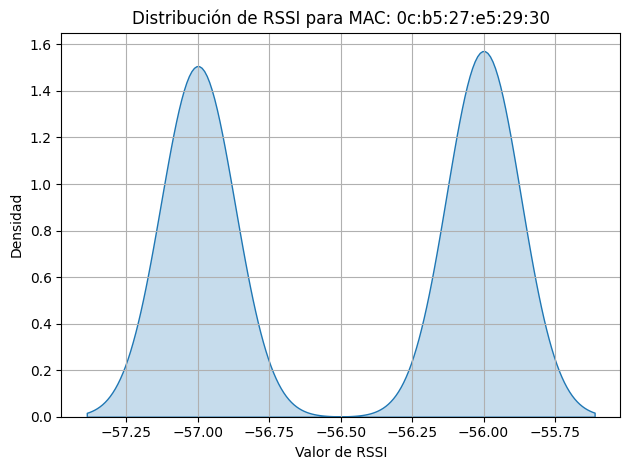

In [12]:
fig, ax = plt.subplots()

sns.kdeplot(diccionario_resultante['0c:b5:27:e5:29:30'], ax=ax, fill='blue')
ax.set_title(f'Distribución de RSSI para MAC: {mac_src}')
ax.set_xlabel('Valor de RSSI')
ax.set_ylabel('Densidad')
ax.grid(True)

plt.tight_layout()
plt.show()

Tiempo para horst_data_1000.txt: 0.2023 segundos
Tiempo para horst_data_10000.txt: 1.8915 segundos
Tiempo para horst_data_50000.txt: 8.8200 segundos
Tiempo para horst_data_100000.txt: 17.7845 segundos
Tiempo para horst_data_500000.txt: 75.0351 segundos
Tiempo para horst_data_1000000.txt: 148.6015 segundos


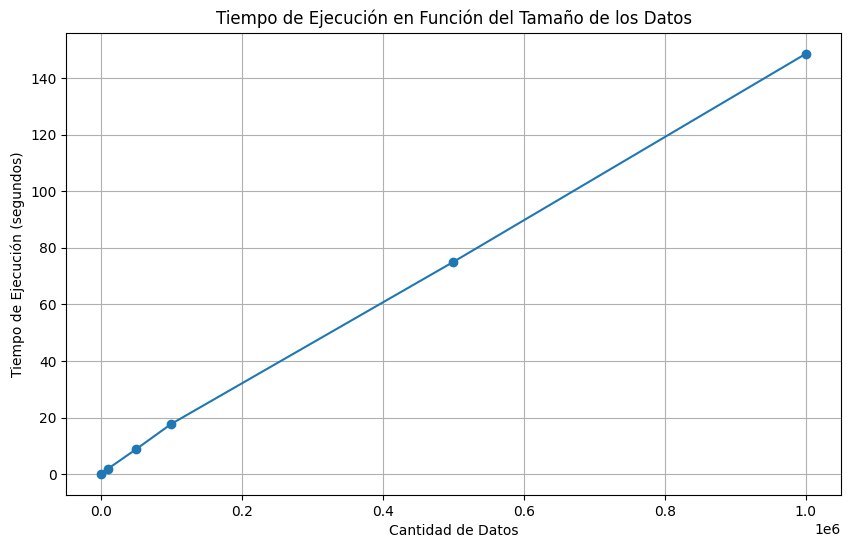

In [11]:
def medir_tiempo(file_path, umbral_segundos):
    df = pd.read_csv(file_path, parse_dates=['TIME'])
    start_time = time.perf_counter()
    diccionario_resultante = calidad_datos(df, umbral_segundos)
    end_time = time.perf_counter()
    return end_time - start_time

umbral_segundos = 5

file_sizes = ['horst_data_1000.txt', 'horst_data_10000.txt', 'horst_data_50000.txt', 'horst_data_100000.txt', 'horst_data_500000.txt', 'horst_data_1000000.txt']
data_points = [1000, 10000, 50000, 100000, 500000, 1000000]

tiempos = []
for file in file_sizes:
    tiempo = medir_tiempo(file, umbral_segundos)
    tiempos.append(tiempo)
    print(f"Tiempo para {file}: {tiempo:.4f} segundos")

plt.figure(figsize=(10, 6))
plt.plot(data_points, tiempos, marker='o')
plt.title('Tiempo de Ejecución en Función del Tamaño de los Datos')
plt.xlabel('Cantidad de Datos')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.grid(True)
plt.show()
